### Stereo Disparity 02

##### Import statements

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from helper import *
from skimage.metrics import structural_similarity

##### Loading images and true disparity maps

Left Camera Matrix
[[1.73374e+03 0.00000e+00 7.92270e+02]
 [0.00000e+00 1.73374e+03 5.41890e+02]
 [0.00000e+00 0.00000e+00 1.00000e+00]]
Right Camera Matrix
[[1.73374e+03 0.00000e+00 7.92270e+02]
 [0.00000e+00 1.73374e+03 5.41890e+02]
 [0.00000e+00 0.00000e+00 1.00000e+00]]
Baseline: 536.62
Image Size (Width, Height): (1920.0, 1080.0)
Conservative Bound of Disparity Levels: [0, 169.0]
Tight Bound of Min and Max Disparities: [55.0, 142.0]


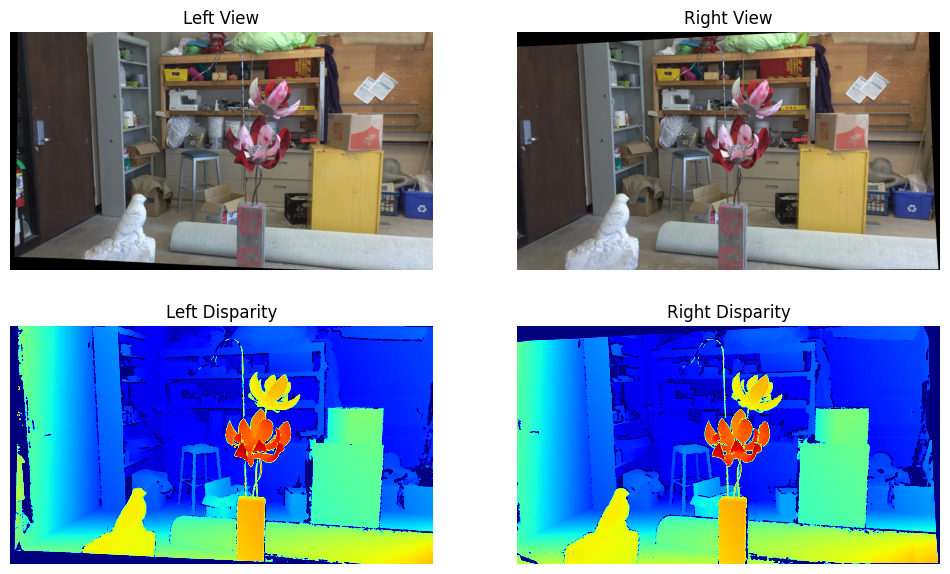

In [2]:
path = "2021 mobile datasets/artroom1"

calib = read_calib( f"{ path}/calib.txt")
disp_L, scale = read_pfm( f"{ path}/disp0.pfm")
disp_R, _ = read_pfm( f"{ path}/disp1.pfm")
img_L_orig = Image.open( f"{ path}/im0.png")
img_R_orig = Image.open( f"{ path}/im1.png")
img_L = np.array( img_L_orig.convert( "L"))
img_R = np.array( img_R_orig.convert( "L"))

print_calib( calib)

display( img_L_orig, img_R_orig, disp_L, disp_R, scale, calib[ "vmin"], calib[ "vmax"])

##### Compute disparity using block matching

In [3]:
stereo = cv2.StereoBM_create( numDisparities=176, blockSize=7)
disparity = stereo.compute( img_L, img_R)

##### Scale the range of disparity into [0-1]

In [4]:
disparity = np.float32( disparity - disparity.min()) / np.float32( disparity.max())

##### Showing disparity

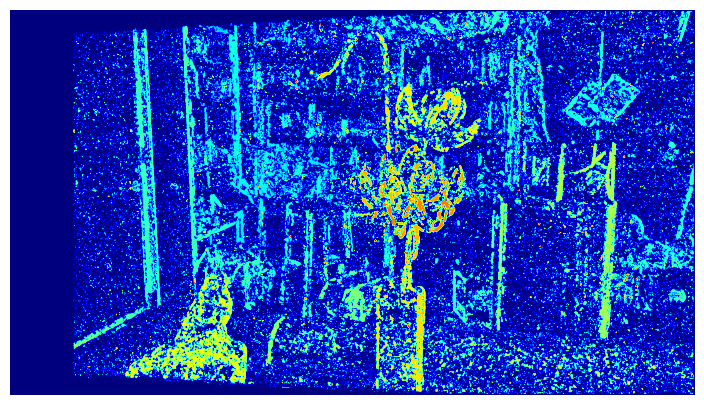

In [5]:
plt.figure( figsize=( 10, 5))
plt.imshow( disparity, cmap="jet")
plt.axis( "off")
plt.show()

##### Compute SSIM

In [6]:
ssim_L = structural_similarity( disparity, disp_L, data_range=1)
ssim_R = structural_similarity( disparity, disp_R, data_range=1)

print( f"SSIM with Left Disparity: { ssim_L}")
print( f"SSIM with Right Disparity: { ssim_R}")
print( f"Mean SSIM: { np.mean( [ ssim_L, ssim_R])}")

SSIM with Left Disparity: 0.03419663808475564
SSIM with Right Disparity: 0.01827090115486388
Mean SSIM: 0.026233769619809763
